# Import Dataset

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
file_path = '/content/drive/MyDrive/SIT782/Alternative_Fueling_Stations.csv'

In [203]:
import pandas as pd
import numpy as np

df = pd.read_csv(file_path)
df

<ipython-input-203-275de96aeb2f>:4: DtypeWarning: Columns (5,6,13,19,22,26,28,30,31,32,35,38,45,46,47,49,50,51,52,53,56,57,58,59,60,62,64,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,X,Y,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
0,-9.603201e+06,3811702.804,1,private,NaN,NaN,NaN,2023/04/06 00:00:00+00,NaN,CNG,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,-9.391743e+06,4004914.018,2,private,NaN,GOVERNMENT,NaN,2023/01/10 00:00:00+00,NaN,CNG,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,-9.411375e+06,3996655.514,3,private,NaN,NaN,NaN,2022/06/14 00:00:00+00,NaN,CNG,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,-1.050581e+07,4213214.042,4,public,24 hours daily,CREDIT_CARD_ALWAYS,FuelMan M V Wright_Exp,2023/02/13 00:00:00+00,NaN,CNG,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,-7.906639e+06,5217274.831,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2022/12/13 00:00:00+00,NaN,CNG,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71076,-9.091067e+06,4197882.995,71077,public,24 hours daily,NaN,NaN,2023/04/25 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""USCPIL13635171""]","[""23026121"",""23026131""]",-81.666440,35.249822
71077,-9.091069e+06,4197882.995,71078,public,24 hours daily,NaN,NaN,2023/04/25 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""USCPIL13635191""]","[""23026151"",""23026161""]",-81.666461,35.249822
71078,-8.838167e+06,4210667.054,71079,public,24 hours daily,NaN,NaN,2023/04/25 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""USCPIL13635681""]","[""23026761"",""23026771""]",-79.394605,35.343552
71079,-1.359815e+07,4540548.712,71080,public,24 hours daily,NaN,NaN,2023/04/25 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""210273""]","[""210273-01"",""210273-02"",""210273-03"",""210273-04""]",-122.154250,37.724280


# Data Preprocessing

In [204]:
print(df.columns)

Index(['X', 'Y', 'OBJECTID', 'access_code', 'access_days_time',
       'access_detail_code', 'cards_accepted', 'date_last_confirmed',
       'expected_date', 'fuel_type_code', 'groups_with_access_code', 'id',
       'open_date', 'owner_type_code', 'status_code', 'restricted_access',
       'station_name', 'station_phone', 'updated_at', 'facility_type',
       'geocode_status', 'city', 'intersection_directions', 'plus4', 'state',
       'street_address', 'zip', 'country', 'bd_blends', 'cng_dispenser_num',
       'cng_fill_type_code', 'cng_psi', 'cng_renewable_source',
       'cng_total_compression', 'cng_total_storage', 'cng_vehicle_class',
       'cng_has_rng', 'e85_blender_pump', 'e85_other_ethanol_blends',
       'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'hy_is_retail', 'hy_pressures',
       'hy_standards', 'hy_status_link', 'lng_renewable_sou

In [205]:
# Select useful featuers
df = df[['access_code', 'cards_accepted', 'fuel_type_code','owner_type_code', 'status_code',
       'station_name',  'facility_type',
       'geocode_status', 'city', 'intersection_directions', 'state',
       'street_address', 'zip', 'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
       'ev_pricing', 'ev_renewable_source', 'nps_unit_name',   'groups_with_access_code_fr', 
       'federal_agency_id', 'federal_agency_code', 'federal_agency_name',
       'ev_network_ids_station', 'ev_network_ids_posts', 'longitude',
       'latitude']]
df

,access_code,cards_accepted,fuel_type_code,owner_type_code,status_code,station_name,facility_type,geocode_status,city,intersection_directions,...,ev_renewable_source,nps_unit_name,groups_with_access_code_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
0,private,NaN,CNG,T,E,Spire - Montgomery Operations Center,STANDALONE_STATION,200-9,Montgomery,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,private,NaN,CNG,LG,E,Metropolitan Atlanta Rapid Transit Authority,FLEET_GARAGE,200-8,Atlanta,NaN,...,NaN,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,private,NaN,CNG,P,E,United Parcel Service,STANDALONE_STATION,200-9,Atlanta,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,public,FuelMan M V Wright_Exp,CNG,T,E,Arkansas Oklahoma Gas Corp,UTILITY,200-9,Fort Smith,NaN,...,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,public,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,CNG,SG,E,Clean Energy - Logan International Airport,AIRPORT,GPS,East Boston,"From Route 1, take the first exit after Callah...",...,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71076,public,NaN,ELEC,NaN,E,TOBS DOWNTOWN LOT 1,NaN,GPS,Shelby,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635171""]","[""23026121"",""23026131""]",-81.666440,35.249822
71077,public,NaN,ELEC,NaN,E,TOBS DOWNTOWN LOT 2,NaN,GPS,Shelby,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635191""]","[""23026151"",""23026161""]",-81.666461,35.249822
71078,public,NaN,ELEC,NaN,E,CARSAW1 MAINPARKING,NaN,GPS,Carthage,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635681""]","[""23026761"",""23026771""]",-79.394605,35.343552
71079,public,NaN,ELEC,NaN,E,"BOA San Leandro Main CA4-111 (San Leandro, CA)",NaN,GPS,San Leandro,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""210273""]","[""210273-01"",""210273-02"",""210273-03"",""210273-04""]",-122.154250,37.724280


In [206]:
# Select ELEC
df = df.loc[df['fuel_type_code']=='ELEC']
df

,access_code,cards_accepted,fuel_type_code,owner_type_code,status_code,station_name,facility_type,geocode_status,city,intersection_directions,...,ev_renewable_source,nps_unit_name,groups_with_access_code_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
144,private,NaN,ELEC,LG,E,LADWP - Truesdale Center,UTILITY,GPS,Sun Valley,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
145,private,NaN,ELEC,LG,E,LADWP - West LA District Office,UTILITY,200-8,Los Angeles,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.448504,34.052542
146,public,NaN,ELEC,P,E,Los Angeles Convention Center,PARKING_GARAGE,GPS,Los Angeles,West hall and South hall,...,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
147,private,NaN,ELEC,LG,E,LADWP - John Ferraro Building,UTILITY,GPS,Los Angeles,Across Hope,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
148,private,NaN,ELEC,LG,E,LADWP - Haynes Power Plant,UTILITY,GPS,Long Beach,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71076,public,NaN,ELEC,NaN,E,TOBS DOWNTOWN LOT 1,NaN,GPS,Shelby,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635171""]","[""23026121"",""23026131""]",-81.666440,35.249822
71077,public,NaN,ELEC,NaN,E,TOBS DOWNTOWN LOT 2,NaN,GPS,Shelby,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635191""]","[""23026151"",""23026161""]",-81.666461,35.249822
71078,public,NaN,ELEC,NaN,E,CARSAW1 MAINPARKING,NaN,GPS,Carthage,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635681""]","[""23026761"",""23026771""]",-79.394605,35.343552
71079,public,NaN,ELEC,NaN,E,"BOA San Leandro Main CA4-111 (San Leandro, CA)",NaN,GPS,San Leandro,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""210273""]","[""210273-01"",""210273-02"",""210273-03"",""210273-04""]",-122.154250,37.724280


In [207]:
# Drop duplicate rows on a condition on station_name
df.drop_duplicates(subset=['station_name'], inplace=True)
df

<ipython-input-207-40e9850094cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['station_name'], inplace=True)


,access_code,cards_accepted,fuel_type_code,owner_type_code,status_code,station_name,facility_type,geocode_status,city,intersection_directions,...,ev_renewable_source,nps_unit_name,groups_with_access_code_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
144,private,NaN,ELEC,LG,E,LADWP - Truesdale Center,UTILITY,GPS,Sun Valley,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.387971,34.248319
145,private,NaN,ELEC,LG,E,LADWP - West LA District Office,UTILITY,200-8,Los Angeles,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.448504,34.052542
146,public,NaN,ELEC,P,E,Los Angeles Convention Center,PARKING_GARAGE,GPS,Los Angeles,West hall and South hall,...,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,-118.271387,34.040539
147,private,NaN,ELEC,LG,E,LADWP - John Ferraro Building,UTILITY,GPS,Los Angeles,Across Hope,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.248589,34.059133
148,private,NaN,ELEC,LG,E,LADWP - Haynes Power Plant,UTILITY,GPS,Long Beach,NaN,...,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,-118.096665,33.759802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71076,public,NaN,ELEC,NaN,E,TOBS DOWNTOWN LOT 1,NaN,GPS,Shelby,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635171""]","[""23026121"",""23026131""]",-81.666440,35.249822
71077,public,NaN,ELEC,NaN,E,TOBS DOWNTOWN LOT 2,NaN,GPS,Shelby,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635191""]","[""23026151"",""23026161""]",-81.666461,35.249822
71078,public,NaN,ELEC,NaN,E,CARSAW1 MAINPARKING,NaN,GPS,Carthage,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""USCPIL13635681""]","[""23026761"",""23026771""]",-79.394605,35.343552
71079,public,NaN,ELEC,NaN,E,"BOA San Leandro Main CA4-111 (San Leandro, CA)",NaN,GPS,San Leandro,NaN,...,NaN,NaN,Public,NaN,NaN,NaN,"[""210273""]","[""210273-01"",""210273-02"",""210273-03"",""210273-04""]",-122.154250,37.724280


In [208]:
location_num = df.shape[0]
print('There are ',location_num, 'EV charging stations in US.')

There are  57760 EV charging stations in US.


In [209]:
print(df.isnull().sum())

access_code                       1
cards_accepted                54030
fuel_type_code                    0
owner_type_code               42552
status_code                       0
station_name                      1
facility_type                 43574
geocode_status                    0
city                              0
intersection_directions       55406
state                            32
street_address                   33
zip                               0
ev_connector_types               44
ev_dc_fast_num                50719
ev_level1_evse_num            57079
ev_level2_evse_num             6373
ev_network                        3
ev_network_web                 7933
ev_other_evse                 57715
ev_pricing                    44268
ev_renewable_source           57407
nps_unit_name                 57577
groups_with_access_code_fr        0
federal_agency_id             56806
federal_agency_code           56806
federal_agency_name           56806
ev_network_ids_station      

# Data visualization

## Import library

In [210]:
pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt

## State

In [ ]:
df['state'].describe()

count     57728
unique       55
top          CA
freq      15764
Name: state, dtype: object

In [ ]:
df_state = df['state'].value_counts().to_frame()
df_state

,state
CA,15764
NY,3745
FL,3053
TX,2721
MA,2690
CO,1940
WA,1923
GA,1723
MD,1478
PA,1415


In [ ]:
x = df_state.index.tolist()
y = df_state.iloc[:, 0]

table = PrettyTable()
table.field_names = x
table.add_row(y)

print(table)

+-------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+
|   CA  |  NY  |  FL  |  TX  |  MA  |  CO  |  WA  |  GA  |  MD  |  PA  |  IL  |  OH  |  VA  |  MI  |  NC  |  MO  |  OR  |  NJ  |  AZ  |  UT |  TN |  MN |  CT |  NV |  WI |  KS |  SC |  IN |  ME |  HI |  VT |  RI |  AL |  DC |  IA |  OK |  AR |  KY |  NM |  NE |  LA |  NH |  ID |  DE |  MS |  WV |  MT | WY | ND | SD | AK | PR | ON | KA | QC |
+-------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----

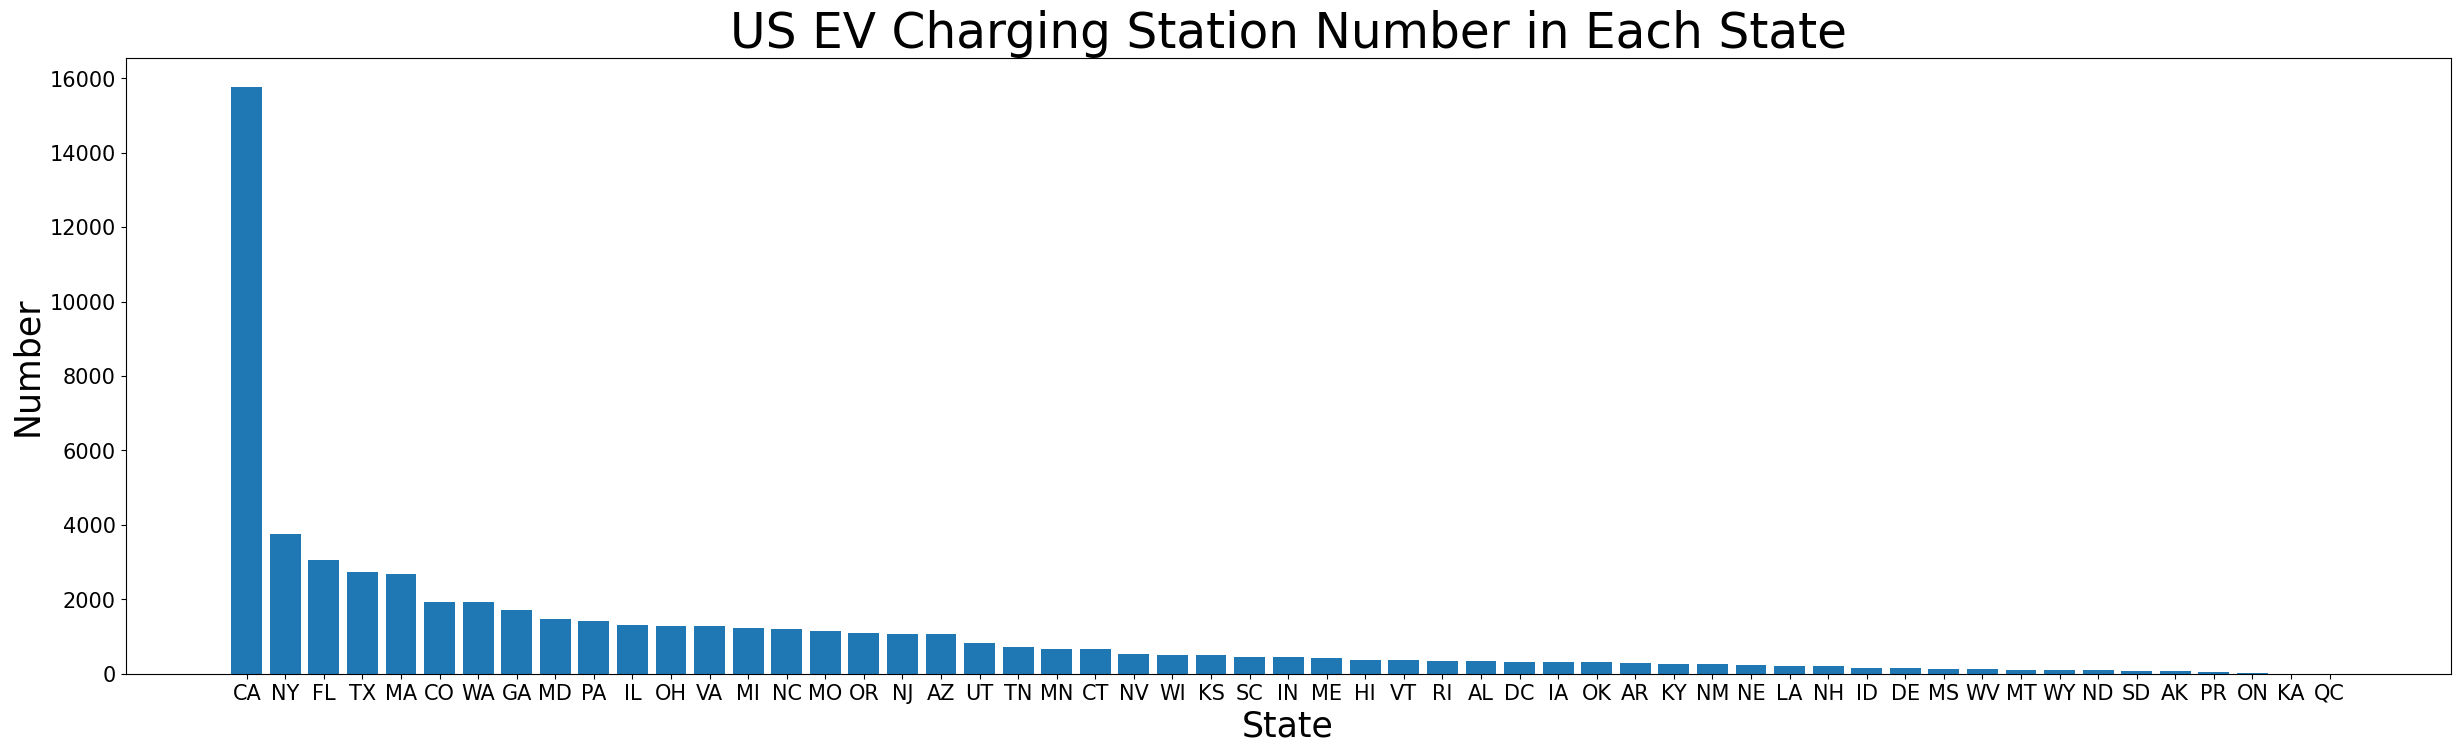

In [ ]:
plt.figure(figsize=(30, 8))

plt.bar(x, y)

plt.title('US EV Charging Station Number in Each State', fontsize=35)
plt.xlabel('State', fontsize=25)
plt.ylabel('Number', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## status_code

In [212]:
df['status_code'].describe()

count     57760
unique        3
top           E
freq      53564
Name: status_code, dtype: object

In [213]:
df_status_code = df['status_code'].value_counts().to_frame()
df_status_code

,status_code
E,53564
T,4137
P,59


In [214]:
x = df_status_code.index.tolist()
y = df_status_code.iloc[:, 0]

table = PrettyTable()
table.field_names = x
table.add_row(y)

print(table)

+-------+------+----+
|   E   |  T   | P  |
+-------+------+----+
| 53564 | 4137 | 59 |
+-------+------+----+


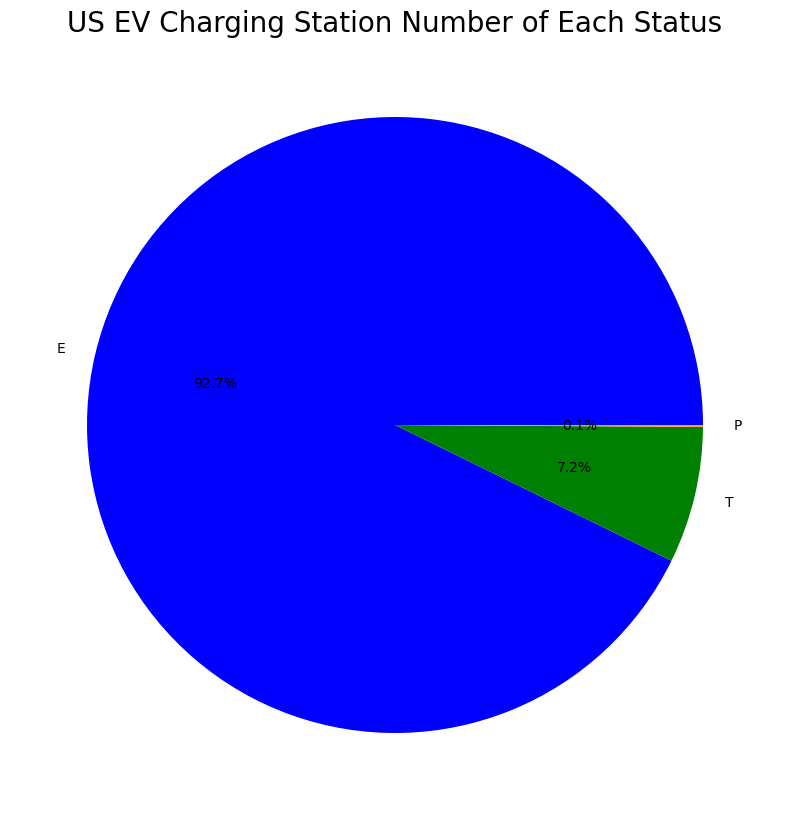

In [217]:
colors = ['blue', 'green', 'orange']  
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, colors=colors, autopct='%1.1f%%')

plt.title('US EV Charging Station Number of Each Status', fontsize=20)

plt.show()

## facility_type
The type of facility at which the station is located, given as code values as described below:

In [ ]:
df['facility_type'].describe()

count     14186
unique       63
top       HOTEL
freq       2803
Name: facility_type, dtype: object

In [ ]:
df_facility_type = df['facility_type'].value_counts().to_frame()
df_facility_type

,facility_type
HOTEL,2803
CAR_DEALER,1910
OFFICE_BLDG,798
FED_GOV,779
PARKING_LOT,743
...,...
RETAIL,3
WORKPLACE,3
STORAGE,2
PHARMACY,2


### GOV

In [ ]:
df_gov = df_facility_type.loc[df_facility_type.index.str.contains('GOV')]
df_gov

,facility_type
FED_GOV,779
MUNI_GOV,655
STATE_GOV,61


In [ ]:
count_gov = df_gov['facility_type'].sum()
print(count_gov, "stations are located in gov.")

1495 stations are located in gov.


### Shopping centre

In [ ]:
df_shopping = df_facility_type.loc[df_facility_type.index.str.contains('SHOP')]
df_shopping

,facility_type
SHOPPING_CENTER,476
SHOPPING_MALL,138


In [ ]:
count_shopping = df_shopping['facility_type'].sum()
print(count_shopping, "stations are located in shopping centre.")

614 stations are located in shopping centre.


### Parking/Garage

In [ ]:
df_garage = df_facility_type.loc[df_facility_type.index.str.contains('GARAGE')|df_facility_type.index.str.contains('PARKING')]
df_garage

,facility_type
PARKING_LOT,743
PARKING_GARAGE,443
PAY_GARAGE,405
STREET_PARKING,70
FLEET_GARAGE,42


In [ ]:
count_garage = df_garage['facility_type'].sum()
print(count_garage, "stations are located in garage or parking area.")

1703 stations are located in garage or parking area.


### Campus/School

In [ ]:
df_campus = df_facility_type.loc[df_facility_type.index.str.contains('CAMPUS') | df_facility_type.index.str.contains('SCHOOL')]
df_campus

,facility_type
COLLEGE_CAMPUS,445
SCHOOL,139


In [ ]:
count_campus = df_campus['facility_type'].sum()
print(count_campus, "stations are located in campus/school.")

584 stations are located in campus/school.


### Park/Camp ground

In [ ]:
df_park = df_facility_type.loc[df_facility_type.index.str.contains('PARK') | df_facility_type.index.str.contains('CAMP')]
df_park

,facility_type
PARKING_LOT,743
COLLEGE_CAMPUS,445
PARKING_GARAGE,443
PARK,223
NATL_PARK,129
STREET_PARKING,70
CAMPGROUND,36
RV_PARK,5


In [ ]:
count_park = 223 + 129 + 36 + 5
print(count_park, "stations are located in park/camp ground.")

393 stations are located in park/camp ground.


### Unit/Utility/INN

In [ ]:
df_unit = df_facility_type.loc[df_facility_type.index.str.contains('UNIT') | df_facility_type.index.str.contains('UTILITY') | df_facility_type.index.str.contains('INN')]
df_unit

,facility_type
UTILITY,404
INN,350
MULTI_UNIT_DWELLING,189


In [ ]:
count_unit = df_unit['facility_type'].sum()
print(count_unit, "stations are located in unit/utility/INN.")

943 stations are located in unit/utility/INN.


### Public/Travel/Service

In [ ]:
df_public = df_facility_type.loc[df_facility_type.index.str.contains('PUBLIC') | df_facility_type.index.str.contains('TRAVEL') | df_facility_type.index.str.contains('SER') | df_facility_type.index.str.contains('TION') | df_facility_type.index.str.contains('POR') | df_facility_type.index.str.contains('TRA')  ]
df_public

,facility_type
PUBLIC,384
REC_SPORTS_FACILITY,132
AIRPORT,131
GAS_STATION,111
TRAVEL_CENTER,95
STANDALONE_STATION,38
CONVENTION_CENTER,16
FIRE_STATION,10


In [ ]:
count_public = df_public['facility_type'].sum()
print(count_public, "stations are located in public/service station.")

917 stations are located in public/service station.


### Grocery/Restaurant/PHARMACY

In [ ]:
df_grocery = df_facility_type.loc[df_facility_type.index.str.contains('PHARMACY') | df_facility_type.index.str.contains('GROCE') | df_facility_type.index.str.contains('RESTAU')]
df_grocery

,facility_type
RESTAURANT,341
GROCERY,198
PHARMACY,2


In [ ]:
count_grocery = df_grocery['facility_type'].sum()
print(count_grocery, "stations are located in Grocery/Restaurant/PHARMACY.")

541 stations are located in Grocery/Restaurant/PHARMACY.


### Other

In [ ]:
count_total = df_facility_type['facility_type'].sum()
count_hotel = df_facility_type[df_facility_type.index == 'HOTEL']['facility_type'].sum()
count_car_dealer = df_facility_type[df_facility_type.index == 'CAR_DEALER']['facility_type'].sum()
count_office = df_facility_type[df_facility_type.index == 'OFFICE_BLDG']['facility_type'].sum()
count_hospital = df_facility_type[df_facility_type.index == 'HOSPITAL']['facility_type'].sum()
count_other = count_total - count_hotel - count_car_dealer - count_office - count_hospital - count_gov - count_shopping - count_garage - count_campus - count_park - count_unit - count_public - count_grocery

### Plot

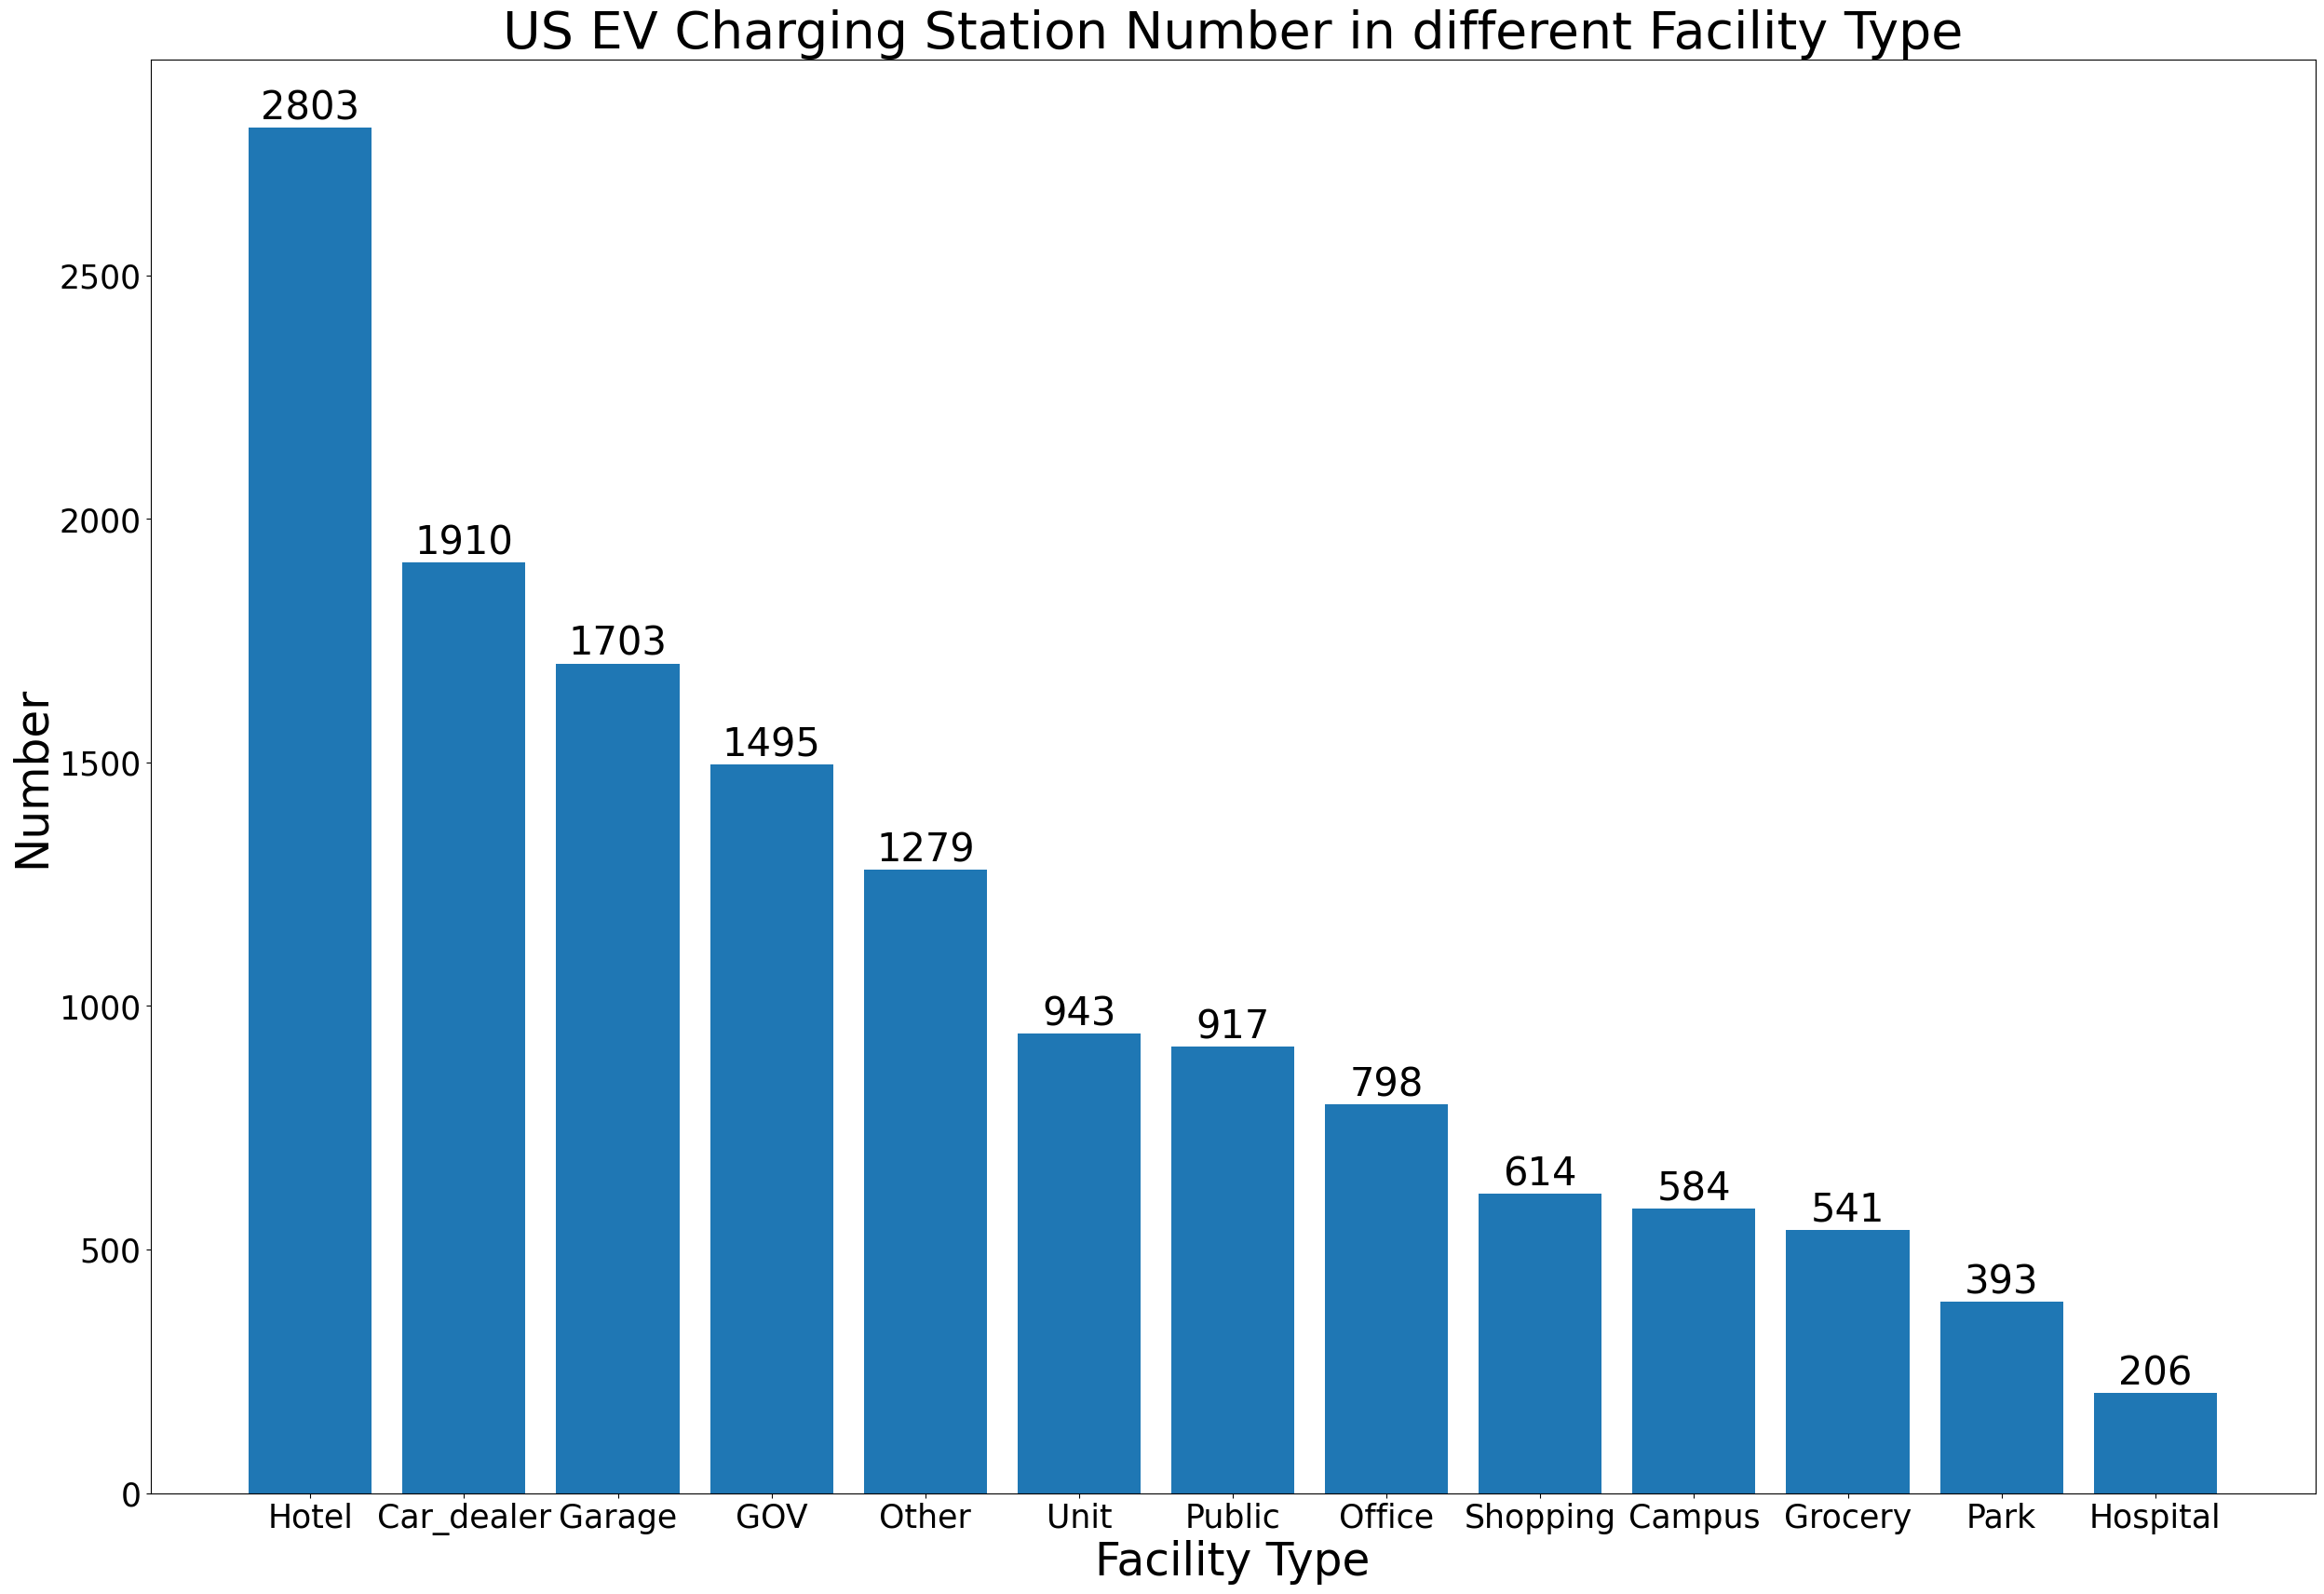

In [ ]:
y = [count_hotel, count_car_dealer , count_office , count_hospital , count_gov , count_shopping , count_garage , count_campus , count_park , count_unit , count_public , count_grocery, count_other ]
x = ['Hotel', 'Car_dealer', 'Office', 'Hospital', 'GOV', 'Shopping', 'Garage', 'Campus', 'Park', 'Unit', 'Public', 'Grocery', 'Other']
# Sort the data
sorted_data = sorted(zip(x, y), key=lambda x: x[1], reverse=True)
# Extract sorted categories and values
sorted_categories = [x[0] for x in sorted_data]
sorted_values = [x[1] for x in sorted_data]
plt.figure(figsize=(30, 20))

plt.bar(sorted_categories, sorted_values)

plt.title('US EV Charging Station Number in different Facility Type', fontsize=40)
plt.ylabel('Number', fontsize=35)
plt.xlabel('Facility Type', fontsize=35)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

for i, v in enumerate(sorted_values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=30)

plt.show()

## cards_accepted 
Return stations that accept any of the given payment methods. A single payment method, or a comma-separated list of multiple payment methods, may be given.
not very useful feature

In [ ]:
df['cards_accepted'].describe()

count              3730
unique               76
top       A D Debit M V
freq               2016
Name: cards_accepted, dtype: object

In [ ]:
df_cards_accepted = df['cards_accepted'].value_counts().to_frame()
df_cards_accepted

,cards_accepted
A D Debit M V,2016
A ACCOUNT_BALANCE D M V,350
A CREDIT D M V,327
A D M V,268
A ANDROID_PAY APPLE_PAY CREDIT D M,243
...,...
ANDROID_PAY APPLE_PAY,1
APPLE_PAY CREDIT,1
ANDROID_PAY APPLE_PAY Debit M V,1
CleanEnergy,1


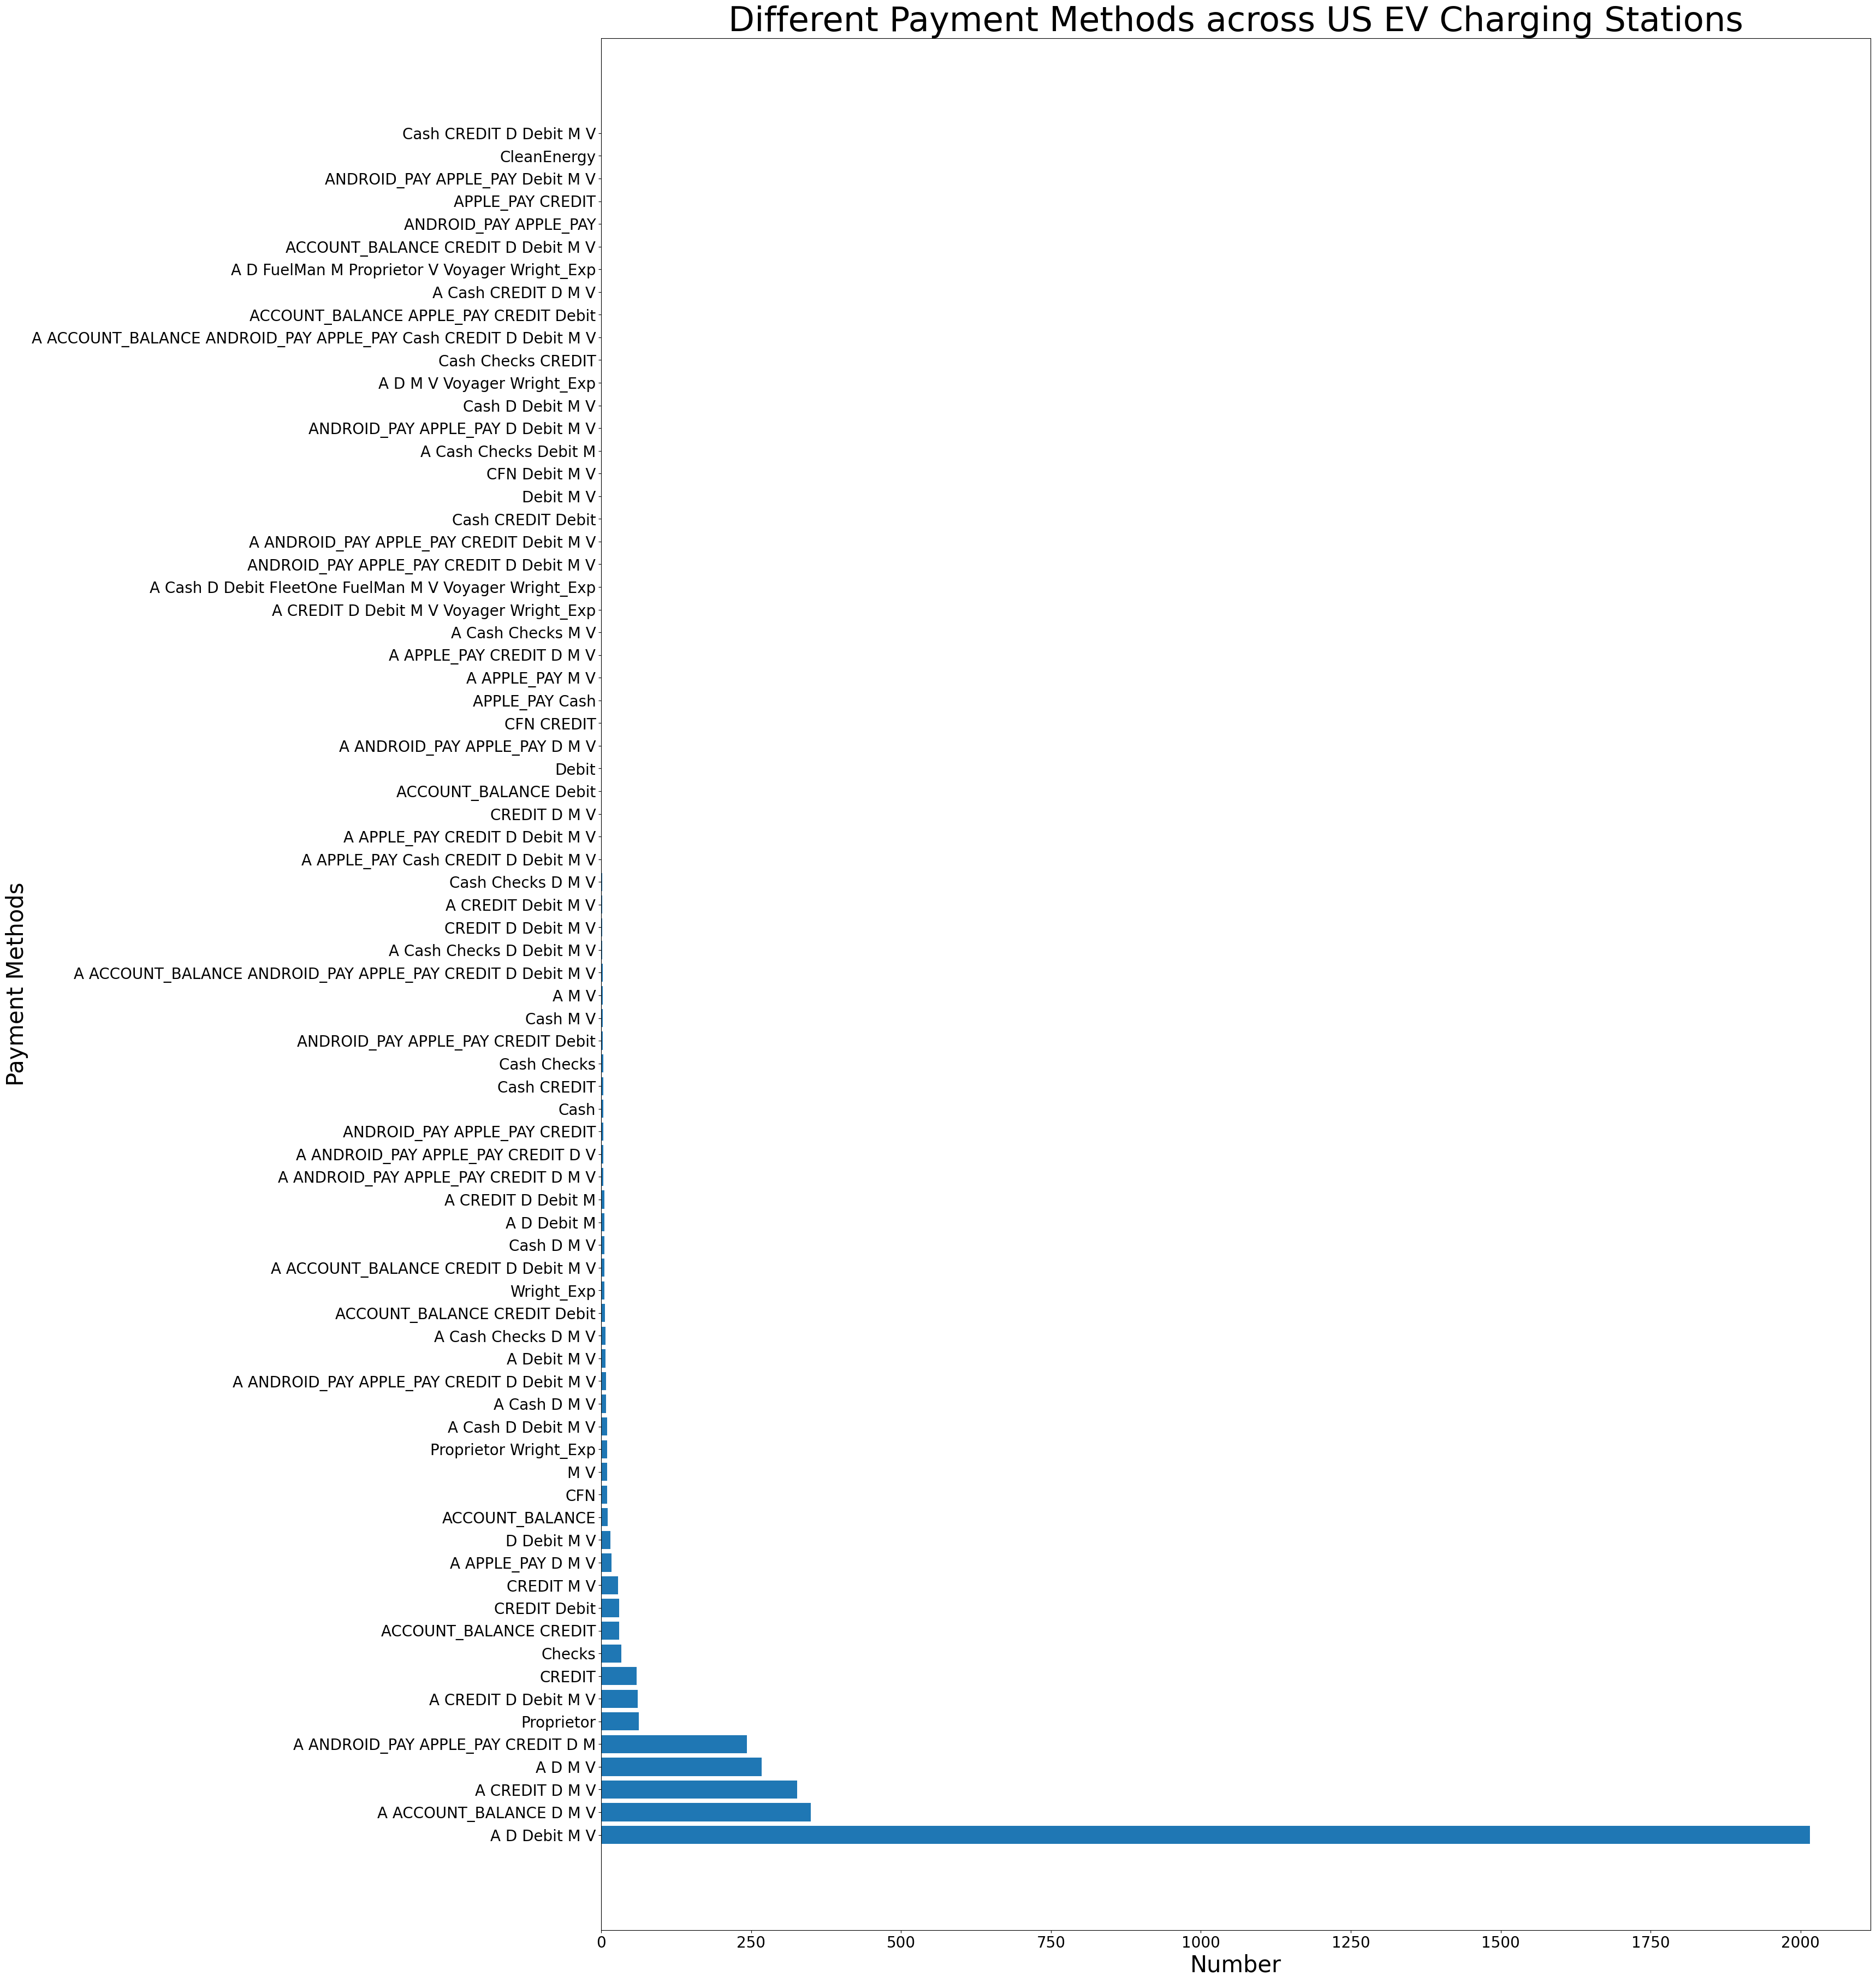

In [ ]:
import matplotlib.pyplot as plt

y = df_cards_accepted.iloc[:, 0]
x = df_cards_accepted.index.tolist()

plt.figure(figsize=(30, 45))

plt.barh(x, y)

plt.title('Different Payment Methods across US EV Charging Stations', fontsize=45)
plt.xlabel('Number', fontsize=30)
plt.ylabel('Payment Methods', fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## owner_type_code
Return stations owned by the given types of owners. A single owner type, or a comma-separated list of multiple owner types, may be given.
P - Privately Owned

In [ ]:
df['owner_type_code'].describe()

count     15208
unique        6
top           P
freq      12495
Name: owner_type_code, dtype: object

In [ ]:
df_owner_type_code = df['owner_type_code'].value_counts().to_frame()
df_owner_type_code

,owner_type_code
P,12495
LG,1143
FG,954
T,388
SG,224
J,4


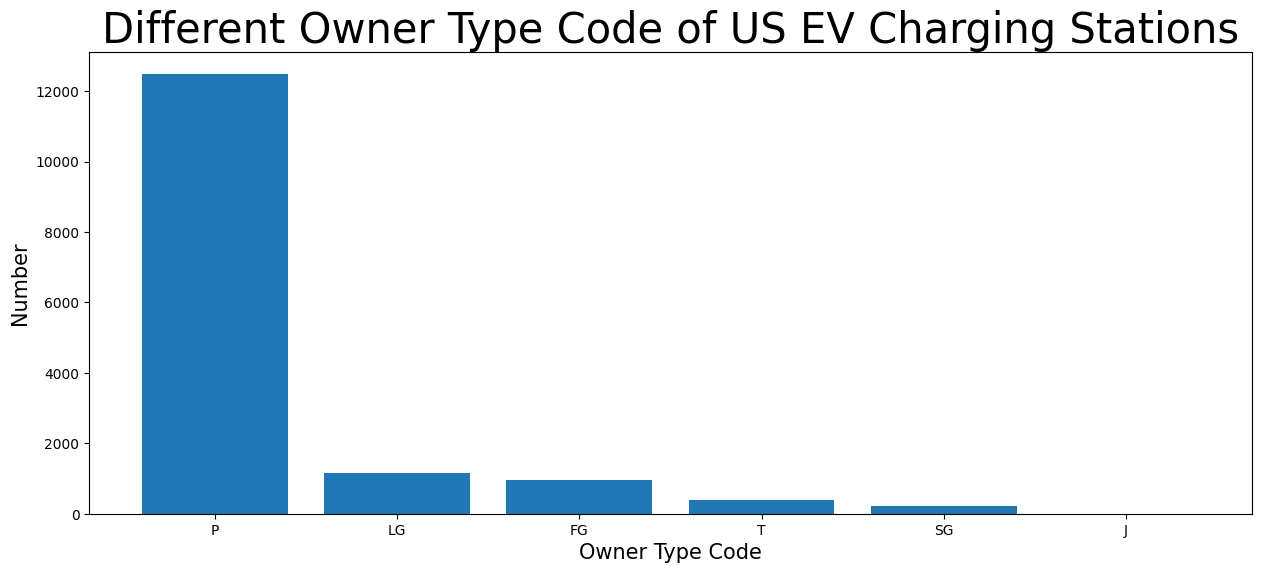

In [ ]:
y = df_owner_type_code.iloc[:, 0]
x = df_owner_type_code.index.tolist()

plt.figure(figsize=(15, 6))

plt.bar(x, y)

plt.title('Different Owner Type Code of US EV Charging Stations', fontsize=30)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Owner Type Code', fontsize=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## access_code
A description of who is allowed to access the station, given as code values as described below:


In [219]:
df['access_code'].describe()

count      57759
unique         2
top       public
freq       55288
Name: access_code, dtype: object

In [220]:
df_access_code = df['access_code'].value_counts().to_frame()
df_access_code

,access_code
public,55288
private,2471


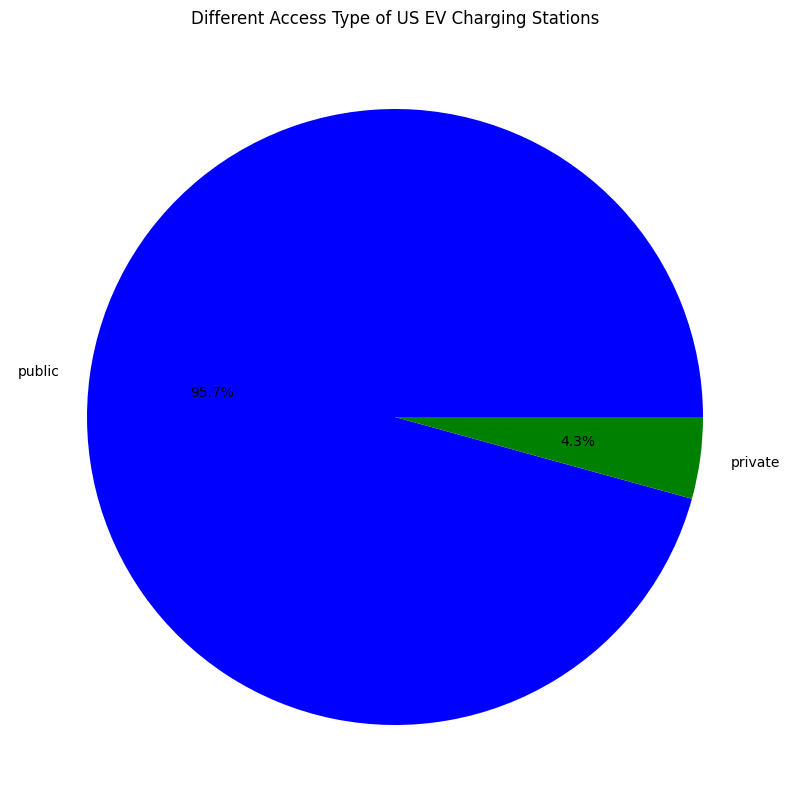

In [221]:
y = df_access_code.iloc[:, 0]
x = df_access_code.index.tolist()

colors = ['blue', 'green']  
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, colors=colors, autopct='%1.1f%%')

plt.title('Different Access Type of US EV Charging Stations')

plt.show()

## federal_agency
Return stations owned by the given federal agency.

In [ ]:
df['federal_agency_name'].describe()

count                    954
unique                    25
top       Department of Navy
freq                     212
Name: federal_agency_name, dtype: object

In [ ]:
df_federal_agency_name = df['federal_agency_name'].value_counts().to_frame()
df_federal_agency_name

,federal_agency_name
Department of Navy,212
Department of the Interior,147
U.S. Department of Energy,139
Department of Justice,93
Department of Veterans Affairs,53
Department of Labor,45
United States Marine Corps,36
Department of Transportation,32
Department of Army,29
Defense Agencies,21


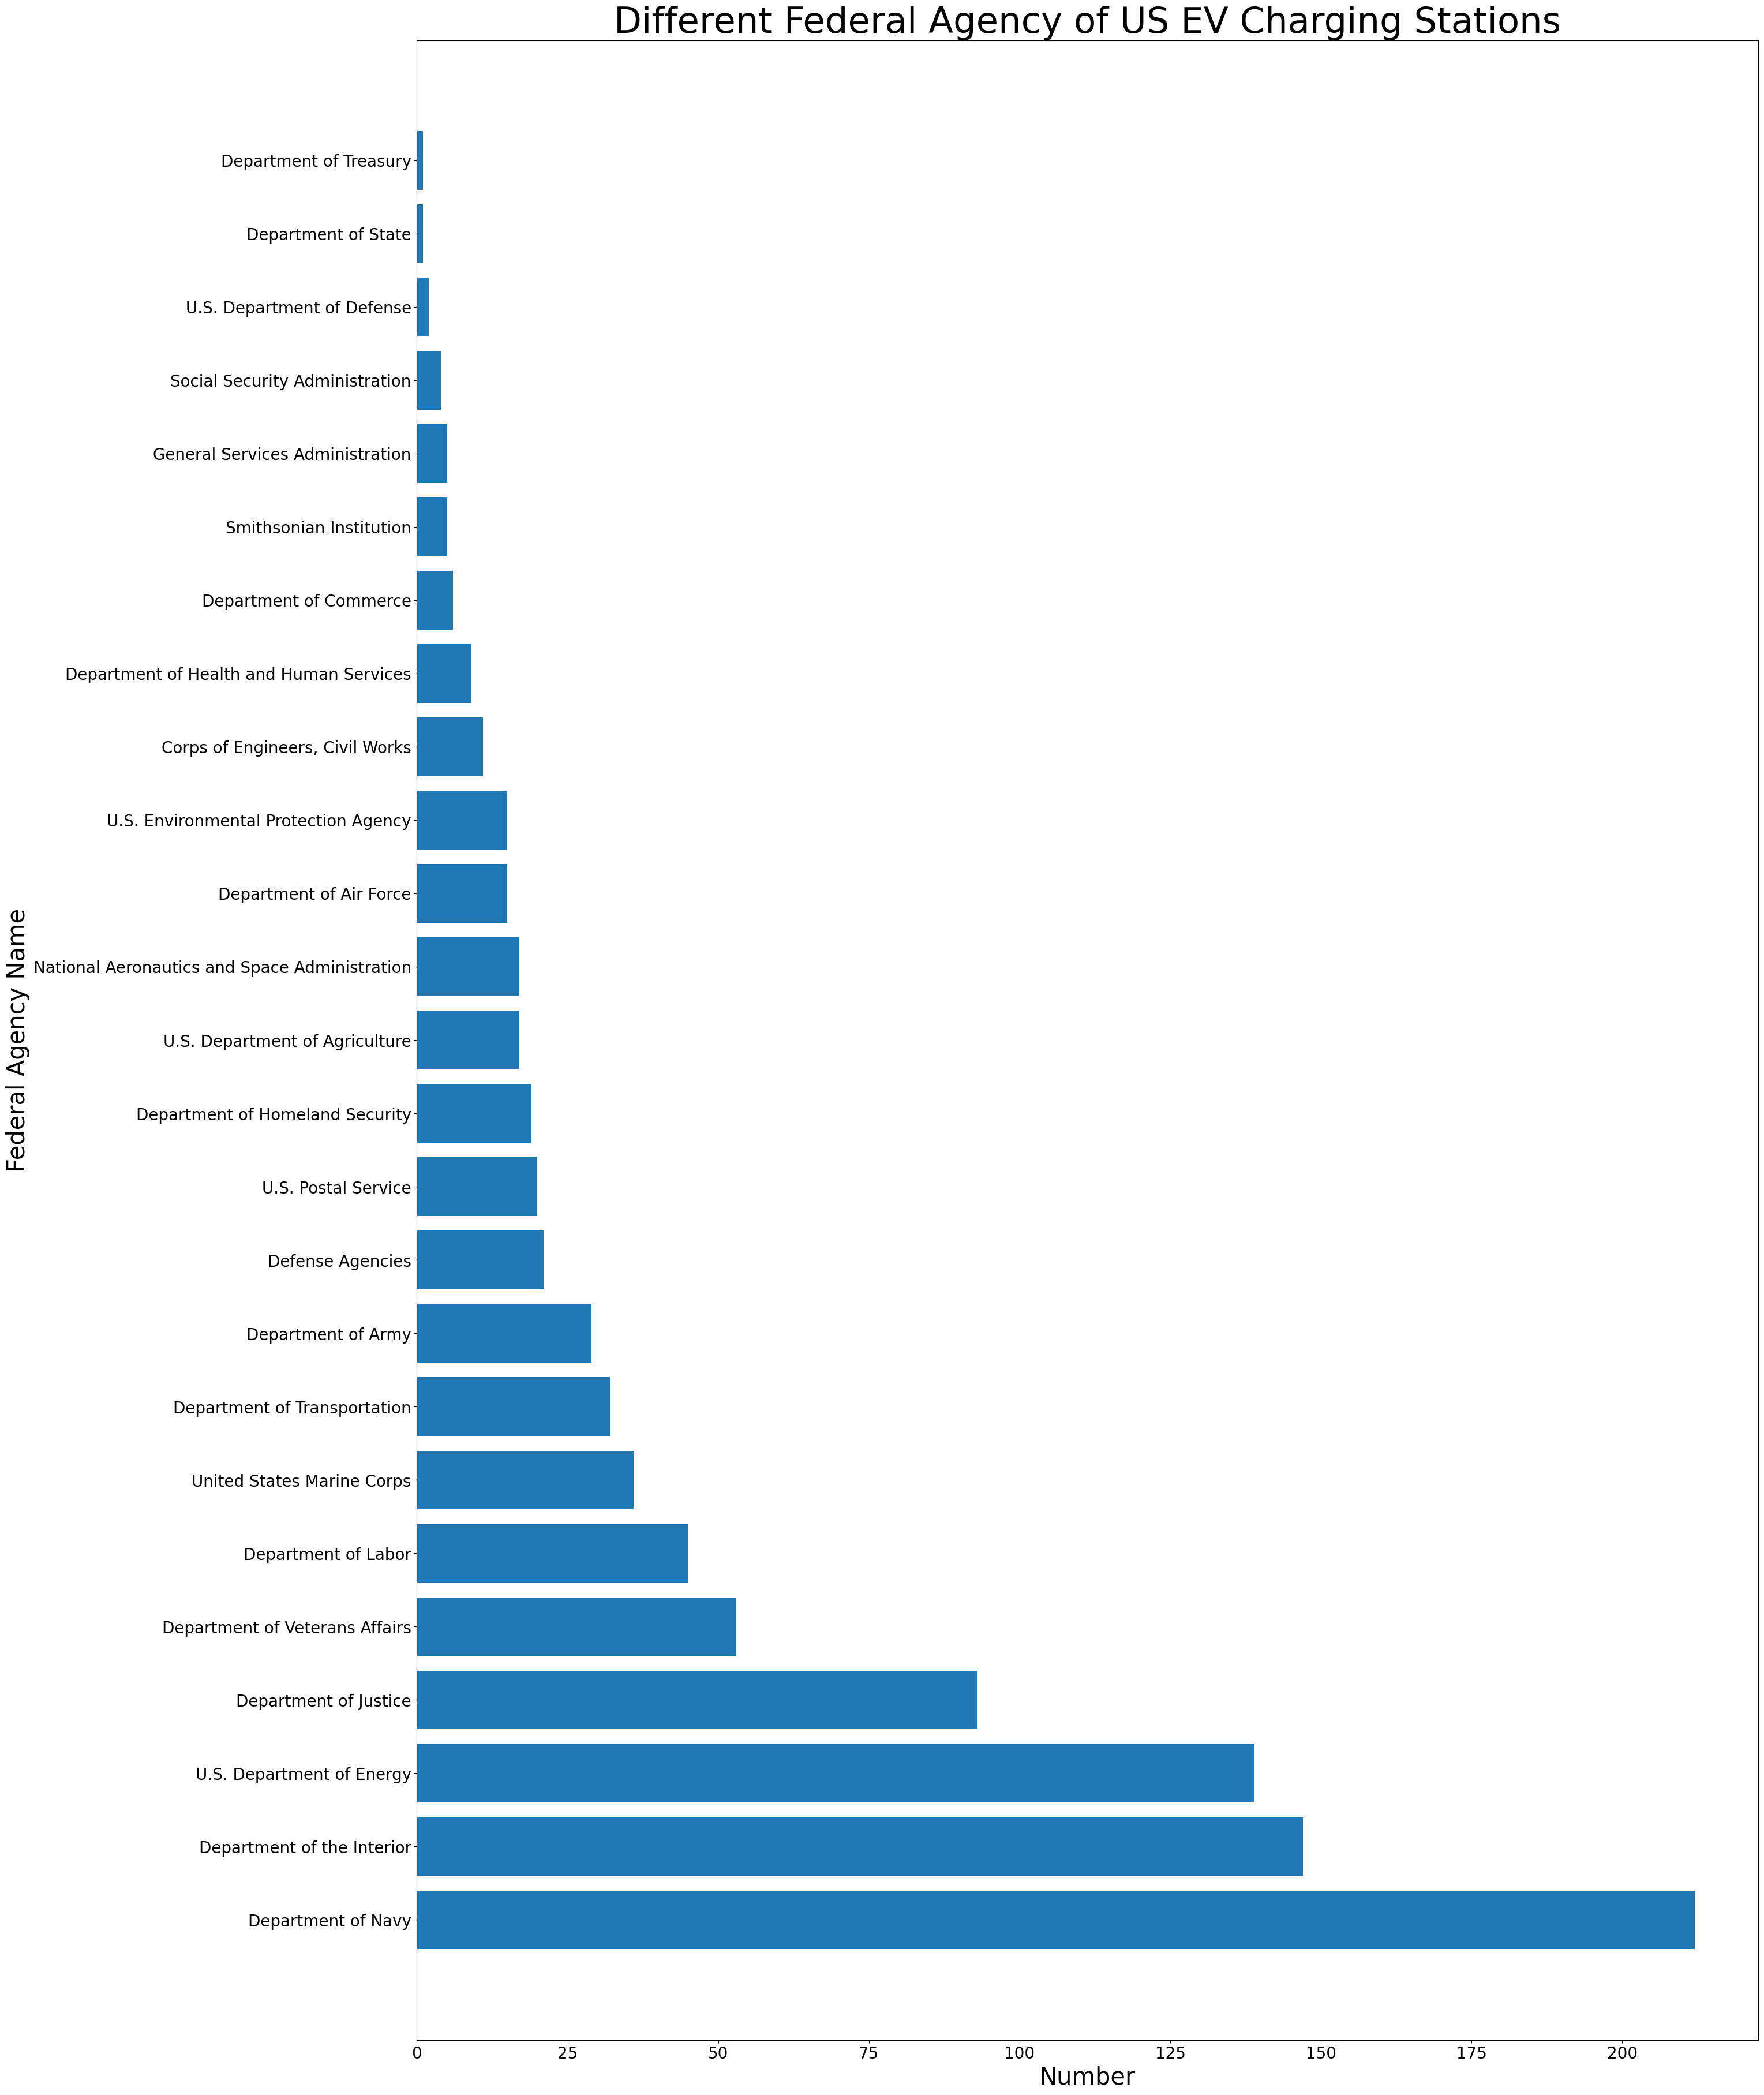

In [ ]:
import matplotlib.pyplot as plt

y = df_federal_agency_name.iloc[:, 0]
x = df_federal_agency_name.index.tolist()

plt.figure(figsize=(30, 45))

plt.barh(x, y)

plt.title('Different Federal Agency of US EV Charging Stations', fontsize=45)
plt.xlabel('Number', fontsize=30)
plt.ylabel('Federal Agency Name', fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## ev_network
Return only electric charging stations that belong to the given network. A single network, or a comma separated list of multiple networks, may be given.

In [ ]:
df['ev_network'].describe()

count                   57757
unique                     34
top       ChargePoint Network
freq                    32606
Name: ev_network, dtype: object

In [ ]:
df_ev_network = df['ev_network'].value_counts().to_frame()
df_ev_network

,ev_network
ChargePoint Network,32606
Non-Networked,7930
Tesla Destination,4168
SemaCharge Network,2163
Blink Network,1815
Volta,1398
Tesla,1229
SHELL_RECHARGE,1140
EV Connect,1051
Electrify America,864


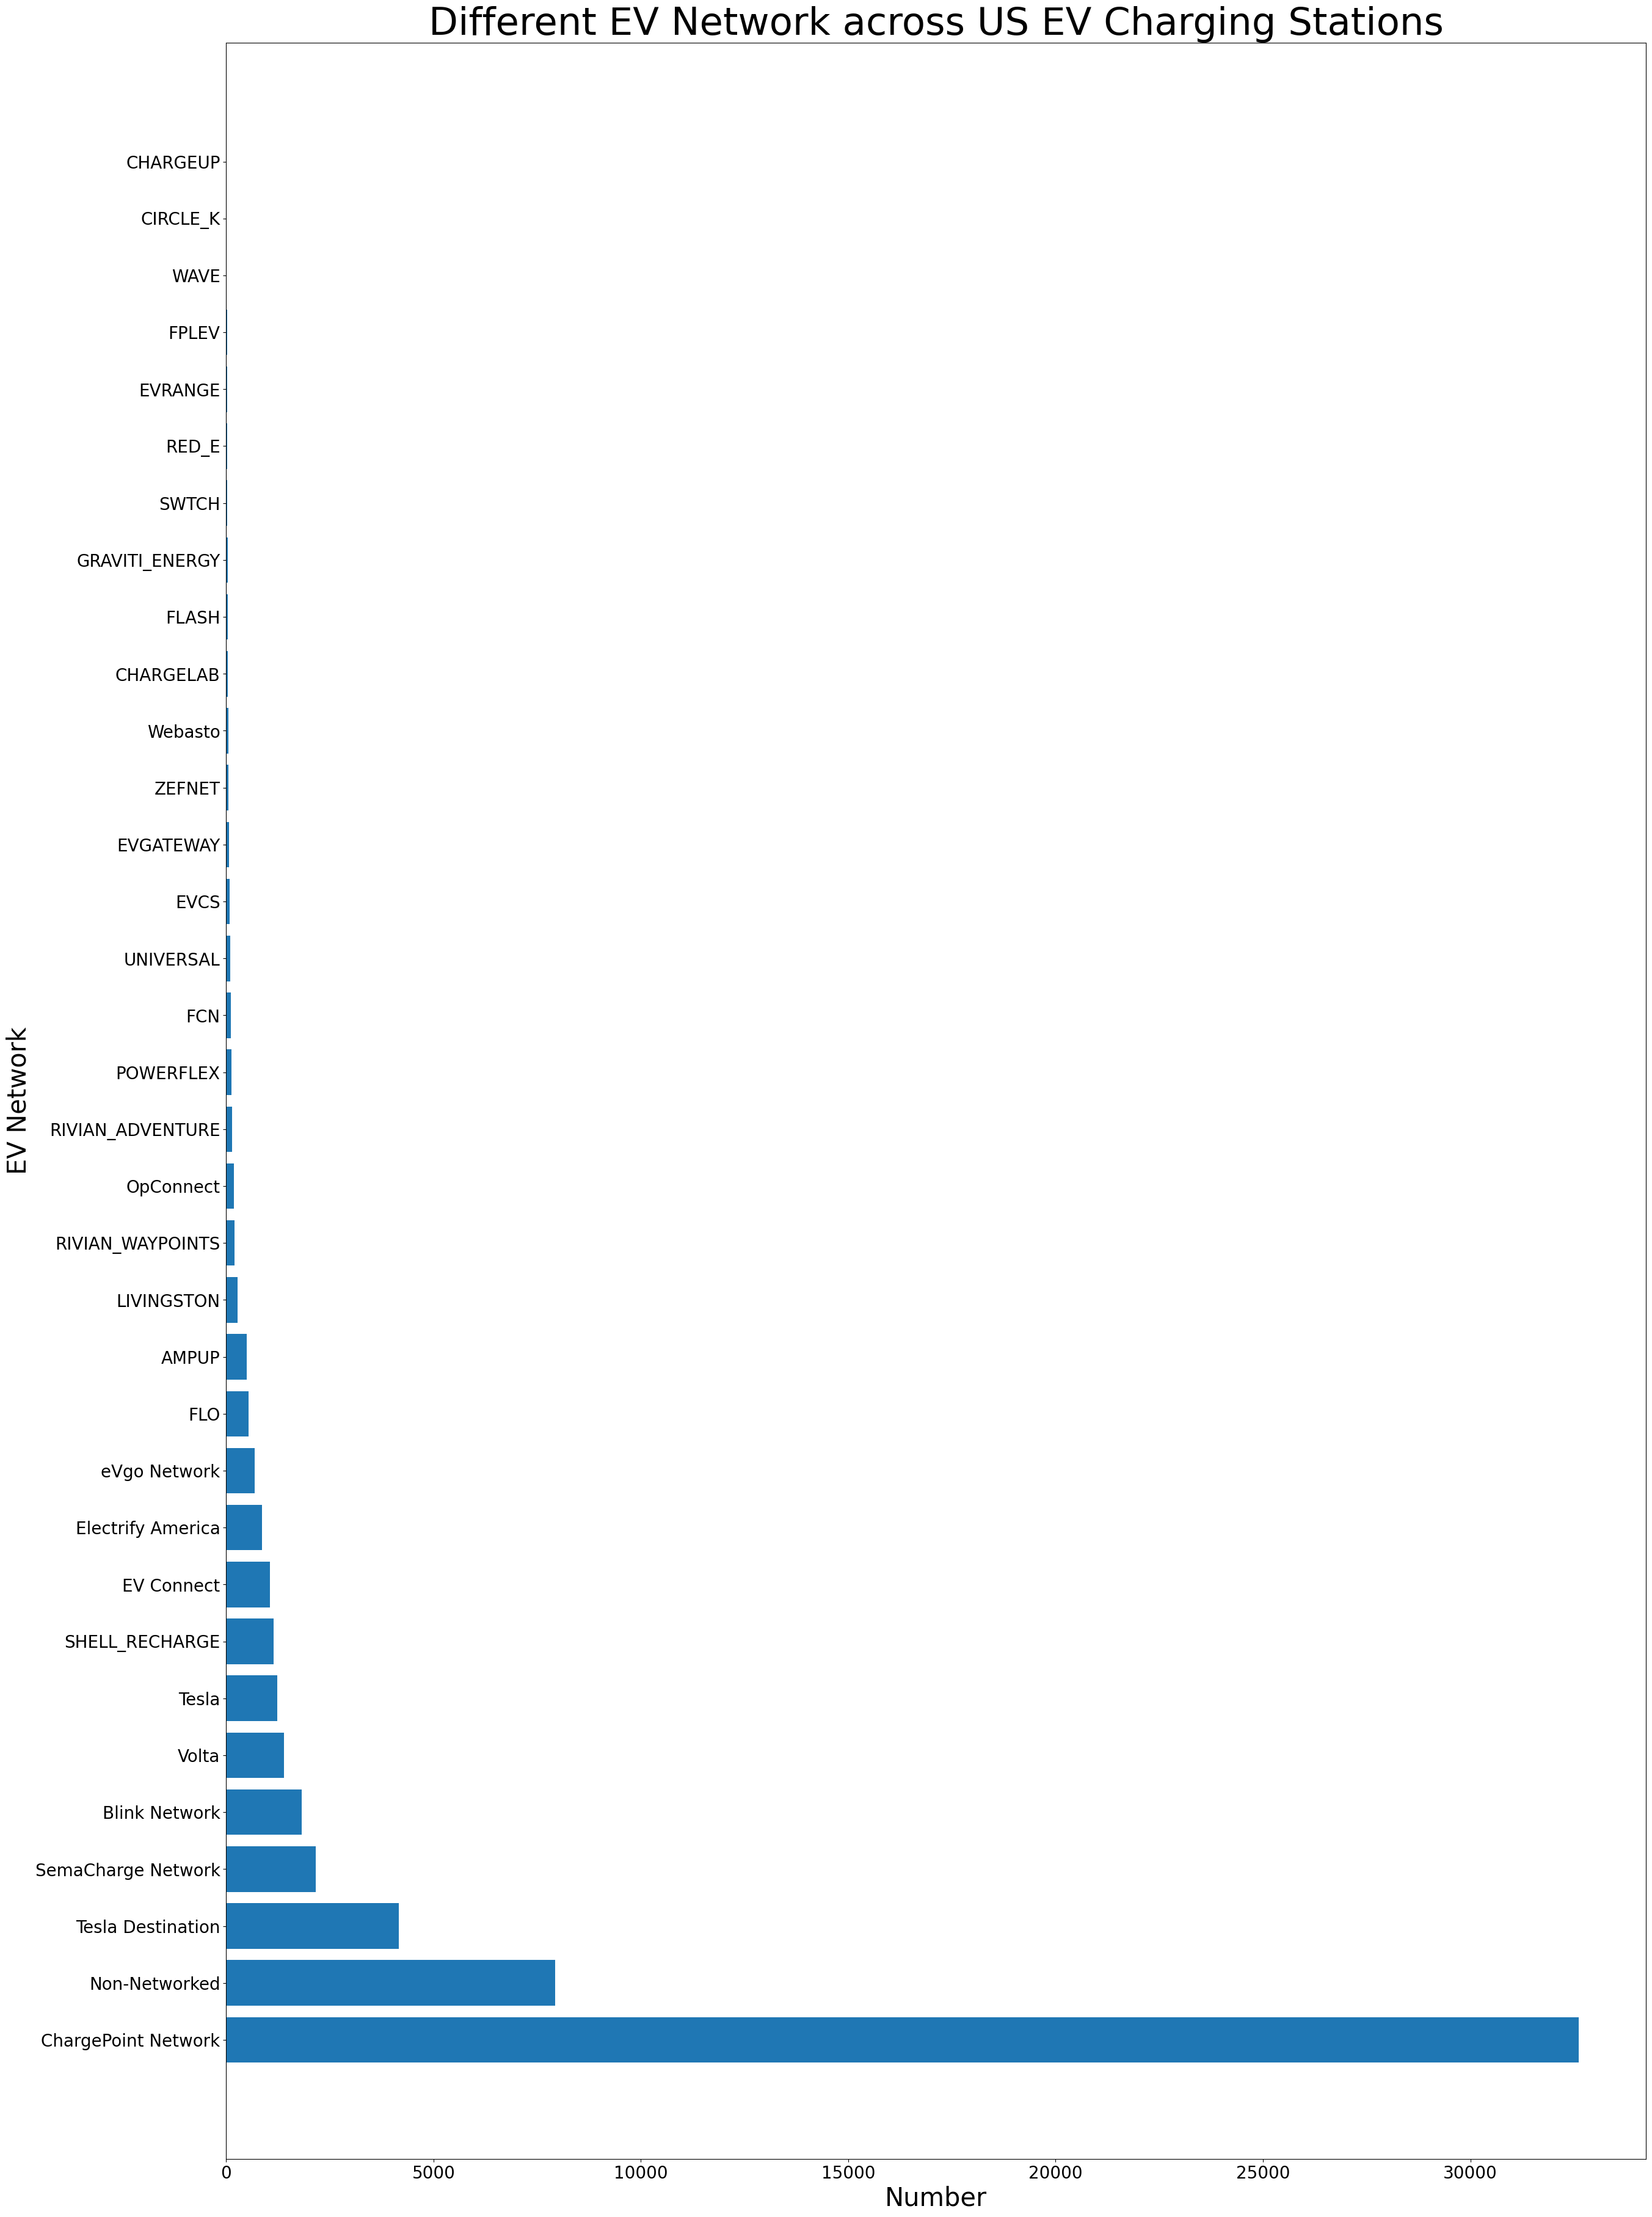

In [ ]:
import matplotlib.pyplot as plt

y = df_ev_network.iloc[:, 0]
x = df_ev_network.index.tolist()

plt.figure(figsize=(30, 45))

plt.barh(x, y)

plt.title('Different EV Network across US EV Charging Stations', fontsize=45)
plt.xlabel('Number', fontsize=30)
plt.ylabel('EV Network', fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## ev_connector_type
Return only electric charging stations that provide the given connector types.
 all, NEMA1450, NEMA515, NEMA520, J1772, J1772COMBO, CHADEMO, TESLA

In [ ]:
df['ev_connector_types'].describe()

count         57716
unique           26
top       ["J1772"]
freq          45694
Name: ev_connector_types, dtype: object

In [ ]:
df['ev_connector_types'] = df['ev_connector_types'].str.replace('[', '', case=False).str.replace(']', '',case=False).str.replace('"', '',case=False).str.replace('"', '',case=False)

<ipython-input-272-376d75467b33>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['ev_connector_types'] = df['ev_connector_types'].str.replace('[', '', case=False).str.replace(']', '',case=False).str.replace('"', '',case=False).str.replace('"', '',case=False)
<ipython-input-272-376d75467b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ev_connector_types'] = df['ev_connector_types'].str.replace('[', '', case=False).str.replace(']', '',case=False).str.replace('"', '',case=False).str.replace('"', '',case=False)


In [ ]:
df_ev_connector_types = df['ev_connector_types'].str.split(pat =',', expand = True)
df_ev_connector_types

,0,1,2,3
144,CHADEMO,J1772,J1772COMBO,None
145,J1772,None,None,None
146,J1772,None,None,None
147,CHADEMO,J1772,J1772COMBO,None
148,CHADEMO,J1772,J1772COMBO,None
...,...,...,...,...
71076,J1772,None,None,None
71077,J1772,None,None,None
71078,J1772,None,None,None
71079,CHADEMO,J1772COMBO,None,None


In [ ]:
def count_cells_with_string(df, selected_string):
    count = 0
    for column in df.columns:
        count += df[column].str.contains(selected_string).sum()
    return count

def connect_type(my_list):
  a = []
  for i in my_list:
    result = count_cells_with_string(df_ev_connector_types, i)
    a.append(result)
    print("There are ", result, "EV stations have ",i, "connector types")
  print(a)

In [ ]:
ev_connector_types_list = ["NEMA1450", "NEMA515", "NEMA520", "J1772", "J1772COMBO", "CHADEMO", "TESLA"]
connect_type(ev_connector_types_list)

There are  151 EV stations have  NEMA1450 connector types
There are  303 EV stations have  NEMA515 connector types
There are  187 EV stations have  NEMA520 connector types
There are  54688 EV stations have  J1772 connector types
There are  5444 EV stations have  J1772COMBO connector types
There are  4917 EV stations have  CHADEMO connector types
There are  5599 EV stations have  TESLA connector types
[151, 303, 187, 54688, 5444, 4917, 5599]


In [ ]:
a = [151, 303, 187, 54688, 5444, 4917, 5599]

In [ ]:
table = PrettyTable()

# Add columns to the table
table.field_names = ev_connector_types_list

# Add rows to the table
table.add_row(a)

# Print the table
print(table)

+----------+---------+---------+-------+------------+---------+-------+
| NEMA1450 | NEMA515 | NEMA520 | J1772 | J1772COMBO | CHADEMO | TESLA |
+----------+---------+---------+-------+------------+---------+-------+
|   151    |   303   |   187   | 54688 |    5444    |   4917  |  5599 |
+----------+---------+---------+-------+------------+---------+-------+


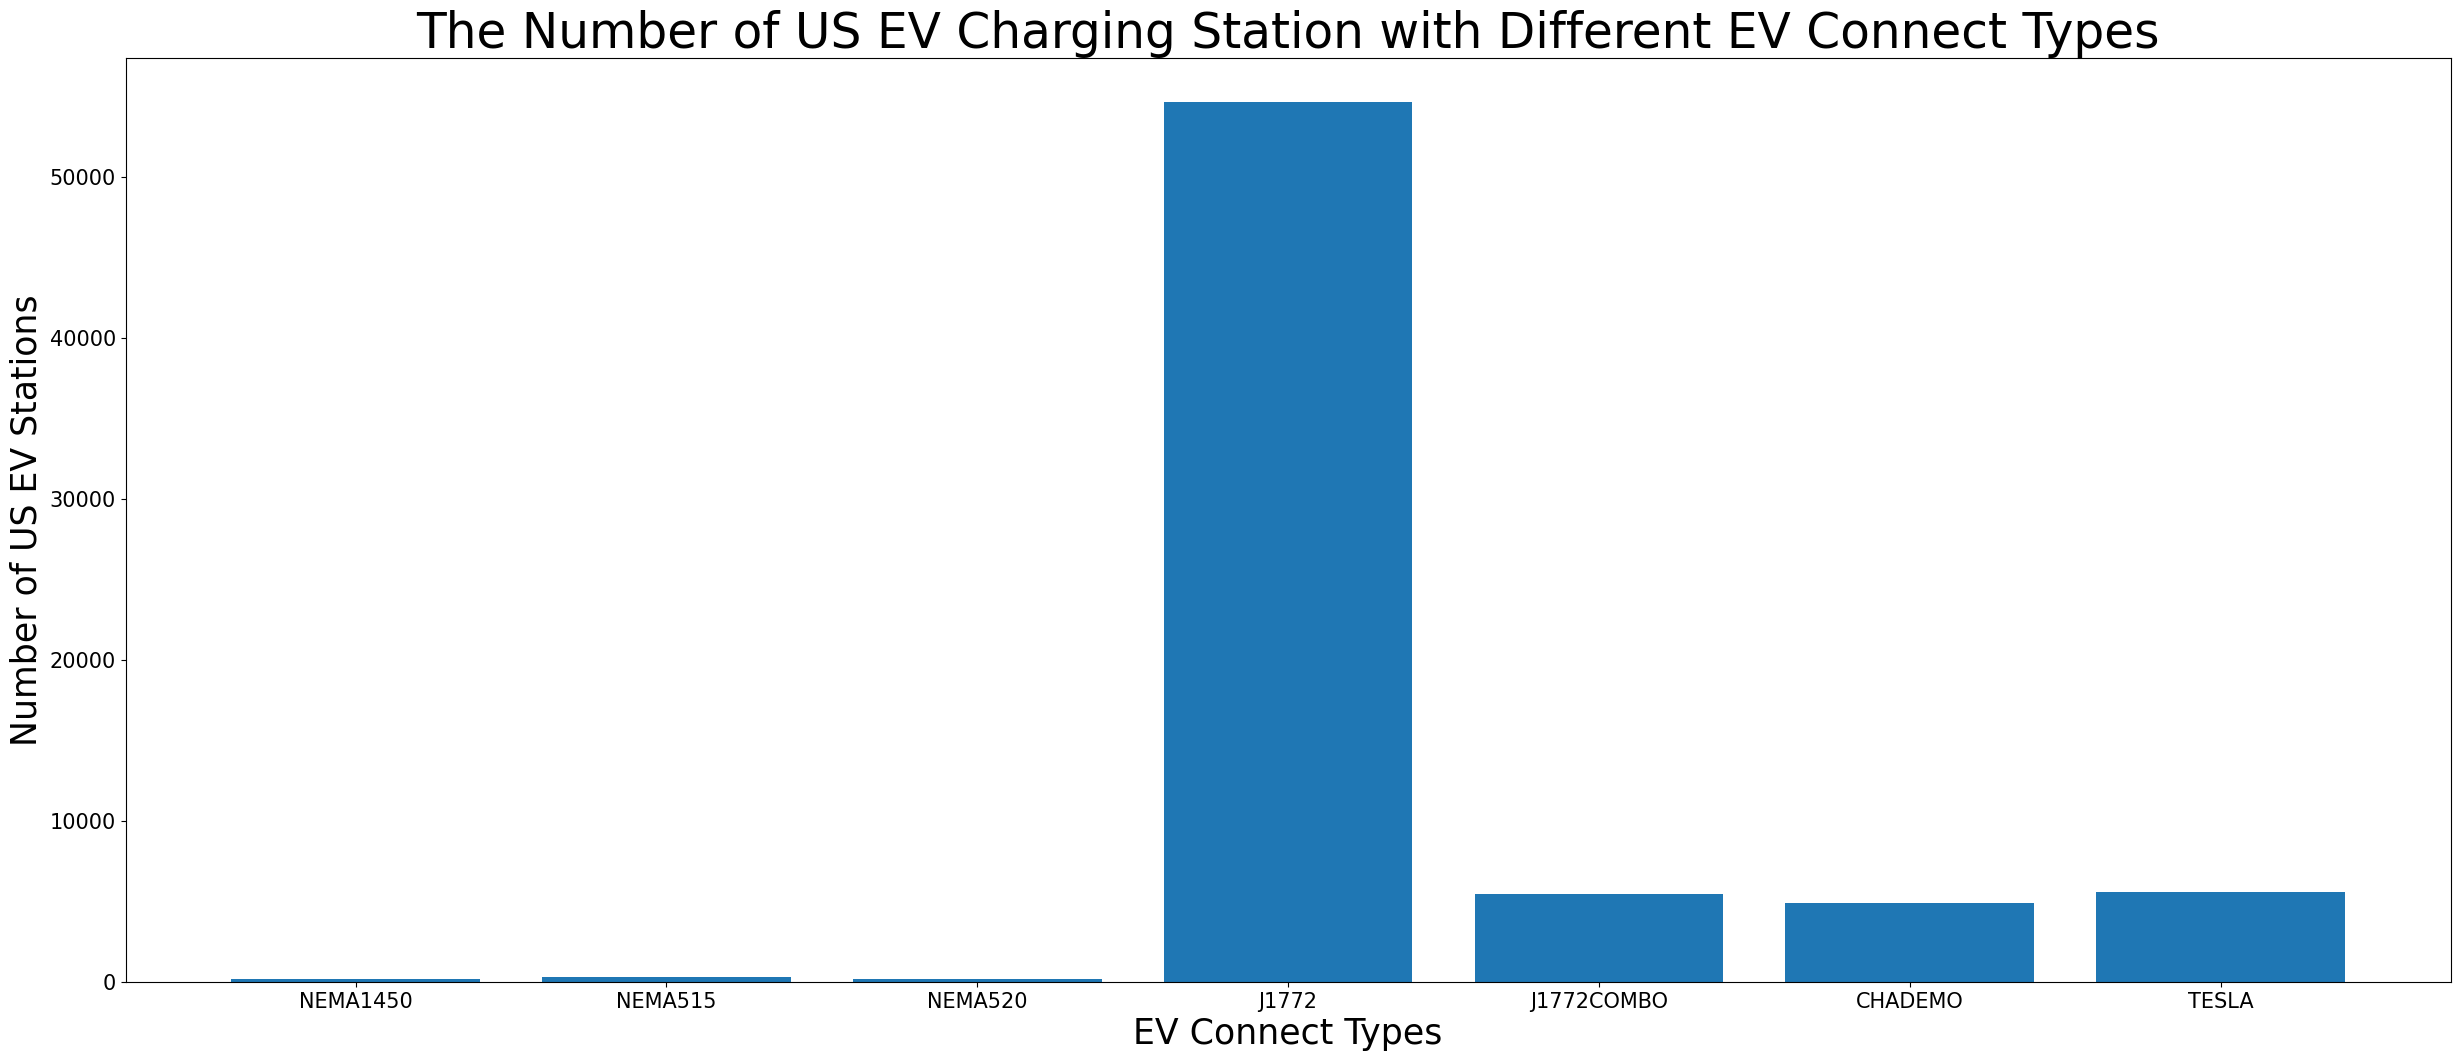

In [ ]:
import matplotlib.pyplot as plt

x = ev_connector_types_list
y = a

plt.figure(figsize=(30, 12))

plt.bar(x, y)

plt.title('The Number of US EV Charging Station with Different EV Connect Types', fontsize=35)
plt.xlabel('EV Connect Types', fontsize=25)
plt.ylabel('Number of US EV Stations', fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## ev_pricing


In [ ]:
df['ev_pricing'].describe()

count     13492
unique      646
top        Free
freq       9286
Name: ev_pricing, dtype: object

In [ ]:
df_ev_pricing = df['ev_pricing'].value_counts().to_frame()
df_ev_pricing.index = df_ev_pricing.index.str.lower()
df_ev_pricing

,ev_pricing
free,9286
$0.28 per kwh; $0.26 per minute above 60 kw and $0.13 per minute at or below 60 kw,1096
free,866
$2.00/hr parking fee,179
$1.00/hr parking fee,103
...,...
$0.5 per hour suggested donation,1
free for guest,1
free for overnight guests and owners,1
free for 0-30 mins; $0.30 per kwh for 30-75 mins; $1.00 per kwh after 75 mins,1


In [ ]:
count_total = df_ev_pricing['ev_pricing'].sum()
print(count_total, "stations provide price information.")

13492 stations provide price information.


In [ ]:
df_ev_pricing_free = df_ev_pricing.loc[df_ev_pricing.index.str.contains('free')]
df_ev_pricing_free

,ev_pricing
free,9286
free,866
free; parking fee,36
"free, only while shopping in publix",33
free for guests,8
...,...
dc: $5 initiation fee + $0.30 per minute; l2: free,1
dc: per minute pricing; l2: free,1
free for guest,1
free for overnight guests and owners,1


In [ ]:
count_free_total = df_ev_pricing_free['ev_pricing'].sum()
count_free_total

10352

In [ ]:
df_free_donation = df_ev_pricing_free.loc[df_ev_pricing_free.index.str.contains('dona')]
df_free_donation

,ev_pricing
free; donations encouraged,2
free; donations accepted,2
free; donations encouraged,1


In [ ]:
specific_text = ['free', 'free with parking']
df_free_only = df_ev_pricing_free.loc[df_ev_pricing_free.index.isin(specific_text )]
count_free_only = df_free_only['ev_pricing'].sum() + df_free_donation['ev_pricing'].sum()
print(count_free_only, "stations are totally free (no charging and extra fees).")

10159 stations are totally free (no charging and extra fees).


In [ ]:
df_free_with_parkingfee = df_ev_pricing_free.loc[df_ev_pricing_free.index.str.contains('park')]
df_free_with_parkingfee

,ev_pricing
free; parking fee,36
free; parking permit required,4
free; parking fee,2
free with parking fee,2
free; pay to park,2
free; pay to park,2
free; parking garage fees,1
free chargers - garage parking rates,1
pay to park; free to charge,1
free; 3 hour parking limit,1


In [ ]:
count_free_with_parkingfee = df_free_with_parkingfee['ev_pricing'].sum() - 1
print(count_free_with_parkingfee, "stations are free for charing but ask parking fee.")

73 stations are free for charing but ask parking fee.


In [ ]:
# free for charging with specific conditions
count_free_with_condition = count_free_total - count_free_only - count_free_with_parkingfee
count_free_with_condition

120

In [ ]:
# non free
count_non_free = count_total - count_free_total
count_non_free

3140

In [ ]:
x = ['Totally Free', 'Charging Free with Parking Fees', 'Charging non-Free', 'Charging Free on Condition']
y = [10159, 73, 3140, 120]

In [ ]:
table = PrettyTable()
table.field_names = x
table.add_row(y)

print(table)

+--------------+---------------------------------+-------------------+----------------------------+
| Totally Free | Charging Free with Parking Fees | Charging non-Free | Charging Free on Condition |
+--------------+---------------------------------+-------------------+----------------------------+
|    10159     |                73               |        3140       |            120             |
+--------------+---------------------------------+-------------------+----------------------------+


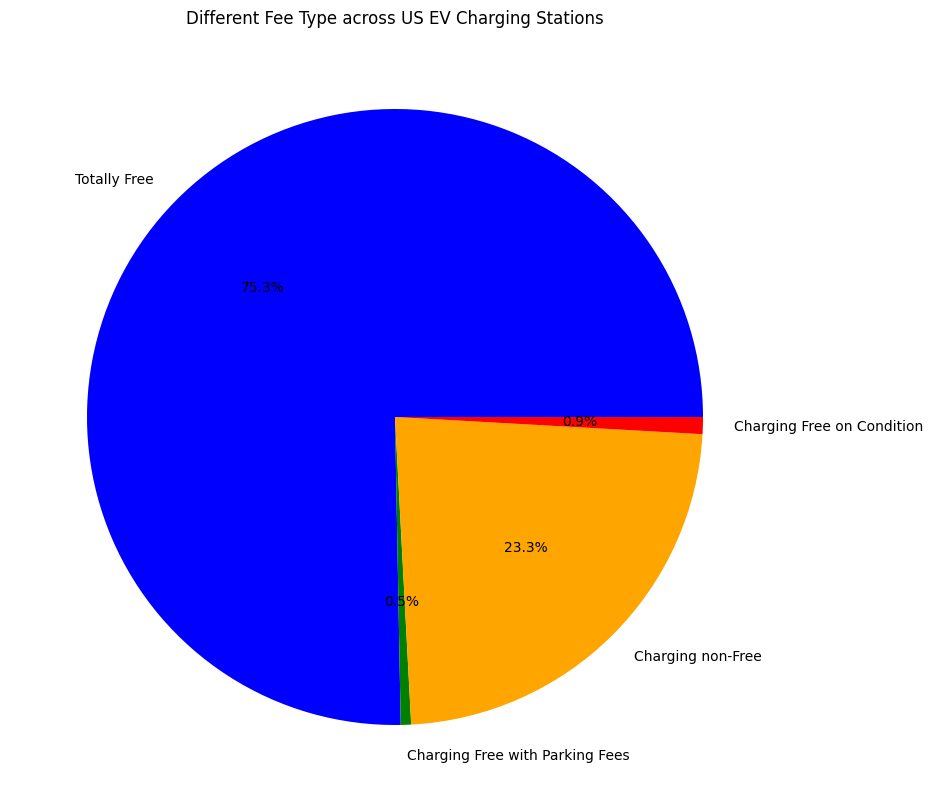

In [ ]:
colors = ['blue', 'green', 'orange','red']  
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, colors=colors, autopct='%1.1f%%')

plt.title('Different Fee Type across US EV Charging Stations')

plt.show()